In [16]:
#import needed packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [17]:
from google.colab import files
uploaded = files.upload()
data = astropy.io.ascii.read("Tonry_2003.vot")
print(data)
# import data files and print to see the data

Saving Tonry_2003.vot to Tonry_2003 (1).vot
  col1     col2    col3   col4    col5    col6  col7  col8  col9  col10    col11  
-------- ------- ------- ------ -------- ----- ----- ----- ----- -------- --------
 SN1972E  314.84   30.08 0.0023    N5253    16 2.839 2.399 0.033 204.9697 -31.6692
 SN1980N 240.161 -56.689 0.0056    N1316     9 3.225  3.14 0.043  50.6753 -37.2074
 SN1981B  292.97  64.743 0.0072    N4536     2 3.334 3.077 0.041 188.6233   2.1995
 SN1981D 240.161 -56.689 0.0056    N1316     9 3.225 3.044 0.055  50.6753 -37.2074
 SN1986G 309.543  19.401 0.0027    N5128    26 2.908  2.44 0.035 201.4028 -43.0316
 SN1988U   8.737 -81.227   0.31     Anon    24 4.968 5.096 0.072   3.5756 -30.4164
 SN1989B 241.991  64.403 0.0036    N3627    37 3.033 2.844  0.03 170.0578  12.9718
 SN1990N 294.369  75.987 0.0044    N4639    21  3.12 3.204 0.035 190.7367  13.2566
 SN1990O  37.654   28.36 0.0307 M+034403    10 3.964 3.977 0.025 258.8999  16.3241
 SN1990T 341.503 -31.526   0.04   P63925   

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

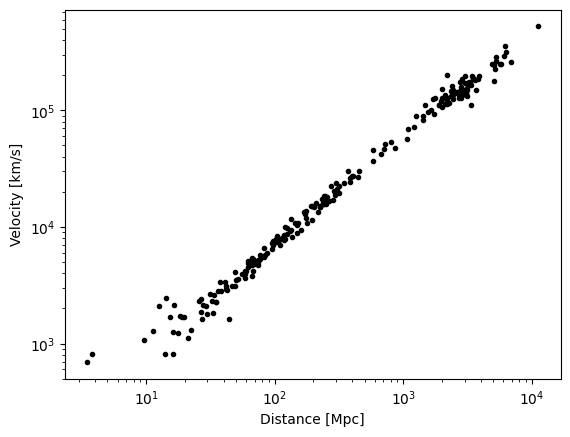

In [18]:
#plotting the data from columns 7 and 8 (on a log scale) so that the velocity (km/s) is the y axis and distance (mpc)is the x axis
#data is plotted in the correct units to be later used to find the hubble constant
distance = 10**data["col8"] / 72.0 * u.mpc
distance_error = (10**(data["col8"]+data["col9"]) - 10**data["col8"]) / 72.0 * u.mpc
velocity = 10**data["col7"] * u.km / u.s
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

Text(0, 0.5, 'Velocity [km/s]')

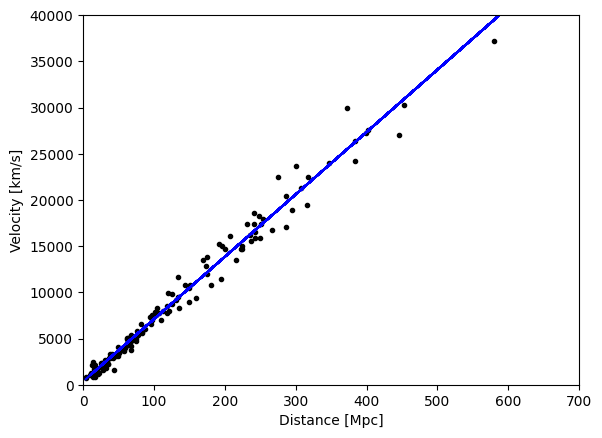

In [49]:
#replotting the data to limit it to closer supernovae

distance = 10**data["col8"] / 72.0 * u.mpc
velocity = 10**data["col7"] * u.km / u.s

# calculating linear fit coefficients and limiting the distance to less than 700 megaparsecs away
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 700))
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1)
p = np.poly1d(z)
velocity_model = p(distance.to(u.mpc).value)
#plotting the best linear fit in blue
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="blue",)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [47]:
h =  z[0] * (u.km * u.s**-1 )/ u.Mpc
print(h)
# the hubble constant is from the first part of the linear equation for the best linear fit of the data

67.48137250840927 km / (Mpc s)


In [48]:
age = 1/h
print (age.to(u.Gyr))
# the age of the universe is the inverse of the hubble constant in gigayears.

14.489809340480448 Gyr
